<a href="https://colab.research.google.com/github/soumyadeepdutta/image-noises/blob/main/image_restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Scripts

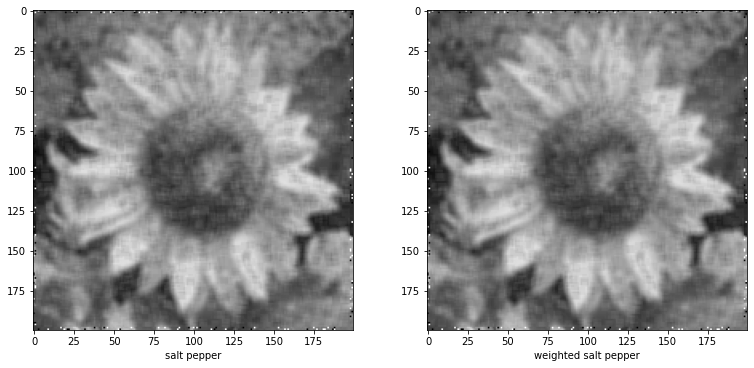

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# from noises import salt_pepper


def mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = np.mean(block, dtype=np.float32)
            img[i][j] = int(m)

    return img

# ignore the most white or dark pixels
def weighted_mean(block, tolerance):
    # print(type(block))
    # print(block.ndim)
    # print(block)
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            if block[i][j] == 0:
                block[i][j] += tolerance
            elif block[i][j] == 255:
                block[i][j] -= tolerance
    return np.mean(block, dtype=np.float32)


def weighted_mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = weighted_mean(block, 10)
            img[i][j] = int(m)

    return img


if __name__ == "__main__":

    # image_file = files.upload()
    # print(type(image_file))
    # adding salt pepper noise in an image
    source = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)
    sp_noisy = add_spnoise(source)
    mean_filtered = mean_filtering(sp_noisy)
    weighted_mean_filtered = weighted_mean_filtering(sp_noisy)

    # view
    plt.figure(figsize=(20, 20))

    plt.subplot(331)
    plt.xlabel('salt pepper')
    plt.imshow(mean_filtered, cmap=plt.cm.gray)

    plt.subplot(332)
    plt.xlabel('weighted salt pepper')
    plt.imshow(weighted_mean_filtered, cmap=plt.cm.gray)

    plt.show()

# CLEAN CODES

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
# Salt and pepper noise
def add_spnoise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    
    number_of_pixels = (row * col)*5//100 # 5% noisy pixel
    for i in range(number_of_pixels):
        
        # Extreme white
        y_coord_w=random.randint(0, row - 1)
        x_coord_w=random.randint(0, col - 1)
        img[y_coord_w][x_coord_w] = 255

        # Extreme dark
        y_coord_b=random.randint(0, row - 1)
        x_coord_b=random.randint(0, col - 1)
        img[y_coord_b][x_coord_b] = 0
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    # number_of_pixels = random.randint(300 , 10000)
    # for i in range(number_of_pixels):
        
    #     # Pick a random y coordinate
    #     y_coord=random.randint(0, row - 1)
          
    #     # Pick a random x coordinate
    #     x_coord=random.randint(0, col - 1)
          
    #     # Color that pixel to black
    #     img[y_coord][x_coord] = 0
          
    return img

In [ ]:
# adding salt pepper noise in an image

source = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

sp_noisy = add_spnoise(source)

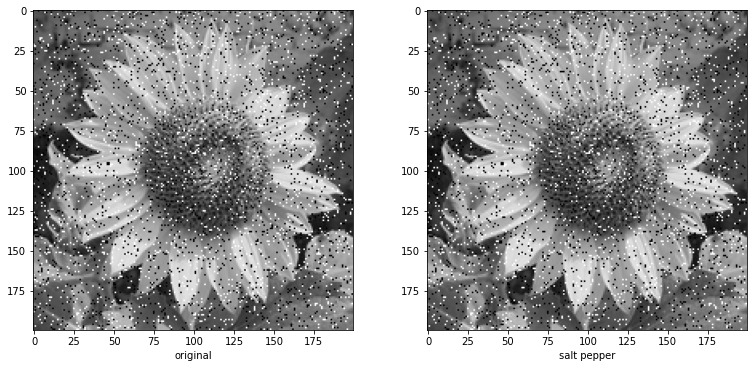

In [ ]:
# view
plt.figure(figsize=(20, 20))

plt.subplot(331)
plt.xlabel('original')
plt.imshow(source, cmap=plt.cm.gray)

plt.subplot(332)
plt.xlabel('salt pepper')
plt.imshow(sp_noisy, cmap=plt.cm.gray)

plt.show()

In [ ]:
# Mean filtering
def mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            # print(block)
            m = np.mean(block, dtype=np.float32)
            img[i][j] = int(m)

    return img

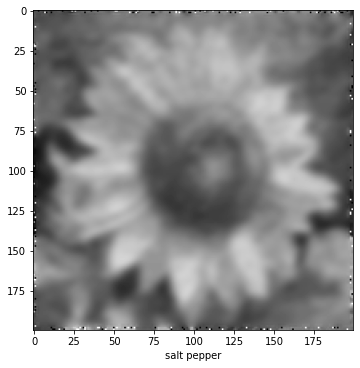

In [ ]:
mean_filtered = mean_filtering(sp_noisy)

# view
plt.figure(figsize=(20, 20))

plt.subplot(332)
plt.xlabel('salt pepper')
plt.imshow(mean_filtered, cmap=plt.cm.gray)

plt.show()

## Weighted mean filter

In [ ]:
def weighted_mean(block, tolerance):
  for i in range(block.shape[0]):
    for j in range(block.shape[1]):
      if block[i][j] == 0:
        block[i][j] += tolerance
      elif block[i][j] == 255:
        block[i][j] -= tolerance
  return np.mean(block, dtype=np.float32)

In [ ]:
# Mean filtering
def weighted_mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = weighted_mean(block, 40)
            img[i][j] = int(m)

    return img

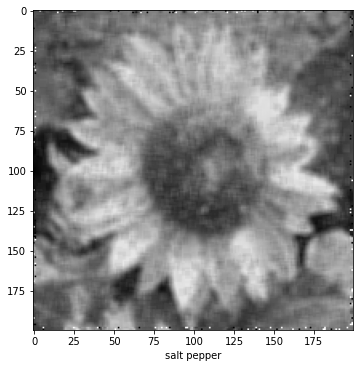

In [ ]:
mean_filtered = weighted_mean_filtering(sp_noisy)

# view
plt.figure(figsize=(20, 20))

plt.subplot(332)
plt.xlabel('salt pepper')
plt.imshow(mean_filtered, cmap=plt.cm.gray)

plt.show()

# TESTING SECTION

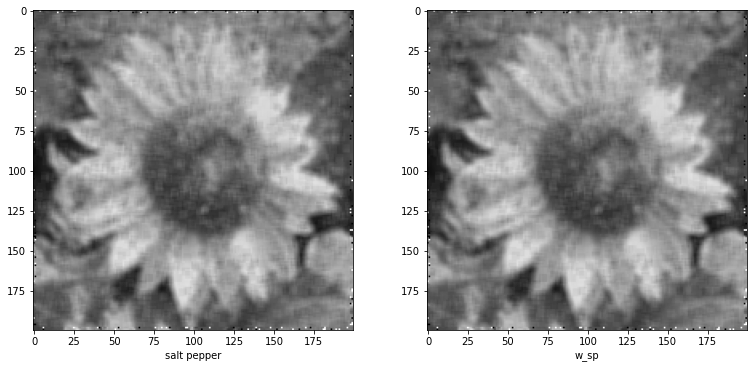

In [ ]:
import numpy as np
import cv2
# import matplotlib.pyplot as plt

# from noises import salt_pepper


def mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = np.mean(block, dtype=np.float32)
            img[i][j] = int(m)

    return img

# ignore the most white or dark pixels
def weighted_mean(block, tolerance):
    # print(type(block))
    # print(block.ndim)
    # print(block)
    for i in range(block.shape[0]):
        for j in range(block.shape[1]):
            if block[i][j] == 0:
                block[i][j] += tolerance
            elif block[i][j] == 255:
                block[i][j] -= tolerance
    return np.mean(block, dtype=np.float32)


def weighted_mean_filtering(im):
    img = np.ndarray.copy(im)
    w = 2

    for i in range(2, im.shape[0]-2):
        for j in range(2, im.shape[1]-2):
            # print(f'Modifying {i, j}')
            block = im[i-w:i+w+1, j-w:j+w+1]
            m = weighted_mean(block, 10)
            img[i][j] = int(m)

    return img


if __name__ == "__main__":
    # adding salt pepper noise in an image
    source = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)
    sp_noisy = add_spnoise(source)
    mean_filtered = mean_filtering(sp_noisy)
    weighted_mean_filtered = weighted_mean_filtering(sp_noisy)

    # view
    plt.figure(figsize=(20, 20))

    plt.subplot(331)
    plt.xlabel('salt pepper')
    plt.imshow(mean_filtered, cmap=plt.cm.gray)

    plt.subplot(332)
    plt.xlabel('w_sp')
    plt.imshow(weighted_mean_filtered, cmap=plt.cm.gray)

    plt.show()

In [ ]:
!wget data:image/webp;base64,UklGRkgiAABXRUJQVlA4IDwiAAAQugCdASrIAMgAPpU8mUoloyIhq5S8cLASiWYAwvaRWn63Zt/Vbl59J/fv8r/u/8T+4Pzc8Ee1/N76d/5/+V/MD5T/9f12/r3/ze5B+u//K/y3Ym/4v/c9X/7d/tF7p3/W/cD4Lf0P/efth/t/lH/mn+O/+XZc+i/5sH/d/cr4mP3B/bj2m//pqQUoXzv+O/4vhH+a/ZP8v/F+i1kP7V9S/wX/s/5f2sf3fgb+s/z3oHfn/9e9Fv8ru9uL/5PoU+DfNh/P9Cv3X/a+b7/4vZD/teRf6t7CX6a/aH3dP9X/9f8j1G/XH/1/2PwR/sX15v3a9rT9yWweqmyrhz18kdmrt5DOU0NCWUEKMlXa/0eRshiAm87hY5iUnpHk+tu+3oFvMpzCfhKOjSdTv+bgQrDbyQWdJMwHX+plP4cfTAdtQPTE2SGqBYdePHbY8WJFR5yrOdCu3BIZdGUHBihgTDj+7xHgBgX6M79gPoWdRFUbRocsUPQ7vM4zh861ahr+2Cf7OYNUqL4h18Sa2ul4PBdMUHafVqPf5sQ51ZFkdtx6MzRZUtZP8x12jk8nj8uxOiJ7/S6RfKvGF8H9j1yasT/2ed7QD7wVwlPjrOlKe5h2WF+S4c0A4VD82FtCWqc1s4WuRxlzdH0VvoVwe6oaCgVIVLdXJXugA+hiJwSuM40kpRlWrtSJNvL90GFQIiDwQKabz/QyJN3aNpWSJVkgyfm8BqbHkUo4OI+/CFW10UAYYALXfgw6uOAnX0eUpbZgsKNQqw/T+EFXXZLxnPz3c+rLZ0kpH+l1dQfeHyH8ATeOmtUuvsCPSYdLYujnQEdxeQwhzwPY3G7h4zQ55RFjrpoOssQHXUWS3frpxzxiUoQWCXMgD6FI1I/pqpcsFb9SlQsYDet1RVuekL5yKcXrHr3OYfOYgkFPZkpfouPGl5h+/+6en49qKOjVk8lEdED1k11U33+hYGe1xwlCbm4QDVNTOc/0e9gb6ZVX0ro/xvMBh/7XBtjH0EQeT+DcIvV555iAzGjkKJ+75RLYOs8oQMnoH34YE0db9sy+ZmvcaRVtnZDHgFPViaUOn4RvPqOm16kLAfyDgbtMc6g6xKefGAMDYL467z1rNREFIXoptjm/4LX/lBMCfEuL2DMte/++vyPV+YwH5YvLeMHHSI3zo37OTnYqCa/1fN8ov9nlRaRoHoYBFaaK16oPONel3+nujL/4rTiKTEbG2oMVBCiyPrzyYQ15zBKT7TYEMrL2yc5//5FdC8dvHu7sXZPSPNGv6AhfcbQQkQC+FVjLO/uz4a8UdDwTbWABp7V7HhxNi2fEuvhfwEGu3HRePk4cNIPzx+5lc6wNC/gI77jRe/JjMnqiRu/+bk97SU2ofUuOc4nWxUdiCml/Xj95QPrtf6SzzxQ6sv9ALDD690Lf+77BvCNi0nToksI5qhvwqzYCOrb1bry/XlfZXykng3VD0WfMlfRV1DihqDT+Mfp/RKGcLksiMVvu87OzriWSST36zsj6sNAxZpowb7hay78ScijFGAVUMKSDPeBMqZIiVgTpOiSjEMxC/Bw674+v0NeIP/auPKNUxYI3xdqaWaMWiPMCPbOEtTiLteaMqxk3ufse2Czo07DKAvGhZ+Wv7Xwl06CIbltkwFZX8vc0BdyHDXe1Rxr3xp//oUZuhGMmSfPGmBWEVWsHWV69npKvcpLRMqP0P9ywxR1HS9NUuYKXMBiVcSuGxn01XKAfwUpLKK8fqtJ2GlNqLgjAPqgmGyZdPYTdCTyf+pHq/3sk2NzhJf2B0n0WevMV/J14jJgSIu2f9yTnX1TZdy4RjhMTEQaHEsp0U0XmMJowp4wKgX5wJpi364t0Ozs7ieeju/X860jUkflr9L3Xo9PVbOiJUqQzzasAx/G2Ka8Huclj7W/evjLv9I5L3HMEH+xJqUatZ9JAfkC2Q+nd1Ow9YVCcnkm75orVN+G+qLXX3Imv/9eMB99mOnV85ym/9xvUJuAA/ui/bWtdU4+OAa3RW2R4WneQ2IVoFGMoDkiBUHToP3BSFV8lKUu2uVVpbo5aXOXTyEn27mBhcMdV+eyTzTXU2M+GUXThRnAMVrBC2ZkHJZvneo9JwFsYSh9wUkHKVvNUKMzVwvVZRnFSEDR6S8/TfwsI6lRAGx8sN/eQARmF8aloHivxW83vZcwWTPZlCKIcdS75hvz0jGINZjuaMhZ4QD7hMJQe3MH/JmtOzqNpcM/f65hd9Q2LmkDoFDA3HFuwAq0Z6it5n4xXob+gBsbFGi9BE74Cp5y3ym0UhfXeOAJZnum6H4efdwQ6ppbJrbuKzI8KiJcADzB3KoXjj89ZGRwgw0q3YQkmUVRw5zFbqe4HNW7bQmdUAu83tWeWzXyiY1bzBiRsVNEE4Mr3nNAl7j2iQ9o96z8O9xEQsdvvMsWwWCPxcoARS2nXFFaCZTMUTHQEZgJ/BuNZsbTfvp3+yHMFasEFakE/jADKEwVktyJzTNpTlmnzM1bc5mU2h36AQ02YYqfNXWE2CLB1VQAYQkaYzznzWN7aAEIcs65U+JOOl01EcNupRRBOLfpVr8Lt27kbkiiOQ8TrFKlJrBtBnuUOZktot2H7sEsdIyHIRK1vlxnHOUTN8hJEc8ox/oGRoTmo5g6HMJDOJqNc7/jWceI5tdg+L3KCKYPA7Yvhf8BxKwLyTu2V7QCVG5uA45c5wFVI5WbwJx40tR7cxnyJj/92tbZLZgmSP2lDcKsxPs1rh4de53gkl0y5pxZpySzc+lNYb5Ef9KntxrvK5ACawOQH4wTgfWVtZ+VjBqXX1Hqpt7umM1t8lF0YveBvKzzmRe6GeUucv2eY52PX4H0m7l2vZLChgodfeBW2wsKPc1SCtJmIdmAvcKe4Ovg1bhm91EUak/3iChLA3C7eITFvBlmtIwgw1rbxRPqAZg/2QmVbHX3rzIpPl84aq6m+BtX7evhoLfIKWhvCY6v5tfzI0xXZwvFmiHYHlYvdUSRhbDvHl+xZAnJeIZEjkUlaSOtLHeQF1ZW8MzXfNlFxF5/+qmixyZvi+n7kBEFC+/KBzV9aDDZ/KX0a2hpDnkoG6QcDzQkn2RaFBL+unEdqP7mLFUVrFm4IsogSwJIzOgg4w4CUPuRgrVxwddOb6a7KgOz5hcu//KK6ajJ/I+Dq4w9jUeY8tN62b2FgopAd6GqWZbHARonG94+5aEFLMNxMFX9bB6kY8TrF7ZOqg8f5wQ7Dp/RUX1zWC7AuomGv5MzJeSjL43L1Z+p0NOTkce3Ya7h1RSW5xH8dcly9vQI8MrCrnsZSWwnMKmBCRhCpKLasPzbgbjQ3CLcMYwheF9BRmLiaqqlwM8cQhS6XYF/G6Zzpc1uMTHDRmuCIT9QYbEBg0BBbj80uwObaAZkenx1m2t9xXcOQSxfEm0JdCnTGdRxYnVWgbdYrXWU5jP4VZZeCveYPiCIfyEIItow6/LX/6osri0+UwkWTURNn18Ix+1EnEIONeDZnSPcZUleLDjyTmmdA2s+QqAKx/kuGz7MWO6xRPdmZu2bCm3Dm4vwfM7n4AGLrsTb3xENwHBNkkMgITijFEHUXJY79jDGoP/Mu2Bb/GD/zHAMIevGy2fkStTpzX2aa+CI3szhIKX7/4TCJDnJAQlVt6RBaIFMdQ2gGrO4OHZpZCziouip3KhY0kO1FUSyvxoiBhROaSxZnhQcgAQ0pis65tYxSKqZUy3OxHQUEb+jQ6BN8d0sPKLnf+vp3U8XeNbN2/6c+9w1ppGyb9lZHe3IePKtmPT3AUav91b3ArdJ4Kyw+7ZhA64UyK0F8iVQzCD6mA7qtyshDwBw6NUXjbWdJ7EWG90s8Q6AyT3WJGdBUOP0vDeouU3If2cqBdaDzQlVVXIl6yQ9CsTHcFEO2fDsVe0KwNJhAe2uUk+NF27Phr84CGiogcA9S5z5S1dVnmvW+VaXPLOu0FAcFlw040S8R1g910XyBOl/VFaJNvUy0j7hhB4yY/YCq3V3SvSq7IpeFfFcJ/GwxjmVOzcP89aL0C/fhMnYzWYV0FAXvoMmyvk9HV8lSq0xfUz3vytOfqES+o8jGMao4DoSW3+2n0O2wbblxmUj+EXoZXJj4IPq7lMiDJVsBxkhahrU87w4ZiUgNfOKDtsigFWnKE6OoMNn4c/U6PYB1gLNSSXftPYOY+Hp3Eo6Iq6xsOSk+hL51HhIWweykfdAW4UQGlvCM4CmPyUGOjtO2STAQyrtjO9jJkXWWJKjDXS7+I1a5UVohAMXCBEO87dAEWrZ+1QMP1WaFjIK4wqzej6toI9pLqFvi1FH9lRyekW0bi+Ij6+7+twgJ/V46y4Bh2Oyk0tibcPZH+V93l0mGCUEtgaxrhp50jzmSFUKyDfXR3XXsRSC9PKh5/35PDvX9JGbYXF4ofzJOUN90UC7xYI54mI0V/0Fu0Ej+S+5Omr5JAbSsPFx73vOmbBS2pmHJmVfxhIt9rhl6pavby5Rxc149RvaFjKw0MCLOFFgcMt6+PUHSngDvTkd6UGOeDgO35uiyJeuBD6VRSzk0TeKGBwphjiyODFDdPlQWJY0h3i1I4XnjMAded+zMmuuCgkfE6vxdk2ck8h1oXxRuu+25ZyfKYAMBEq8bnleW5QI4lKjNQJ/26sYGkC8+XiC5hRKuXy0f4AxcGGziWdPNZVRCzr6z7q7vi1KrZMKiIiGNQeTmHwARymAOkyLOw/iqsnOr4WUH6WDoORekEMOAkakVF5ZgmbffG9xe6xv/+XkRJZqXx2hF026d6EOJ27dbLCKS1By16S5MIbmYqpcKZp3FuX1mkOl5Dc17jJFchyKrQB/fv63b2M0Gfs6mNAOe3kXV77/iY4ErOgXiGIV2Jbj1/dkUWP/tgr1CdhV/BB2HuchjAeO7DCBIro+BBnkGoxFDMAbaieTrkN8+pVUtyfSYKAqdCAvYD9EFE81S+Mk1NsId5qtTi2z8vyl//F41RH4GX3F+RFU8YHa33GD0pmAZQX1g7F+K1cbQtpCF6Rrw5eAfD6XMAsjz3NH/u5HjvfsBmpCs6cjTtXyWA+SQUtzMHwpxP7VjwieqZe2GB8xpIt2zc5DXWISwBptaqQ78eQFK0wFgxE3L4S6kDMX7NiHdpc89Yy9plDheAUse/r98BvZIn+PEyob4F9qleNU8X5j3hq+v1NsLEo68VX4A+vXktJPz9UpbCFYFqXdLmIuVf9X5FF1GtwOWDrqmPnXHOmrnhfzM5vWru/oXivKHAuAcagg5kndXYfYs5Cu/T1bYn3CL3q6EV7CTIBXVUlDayDtQmMmlMh98P85Y6rzVUPdMnFiHrWiGJsFVMgrQVU+su5bOibigoysm5r8/CT9oX85aRt0uxvC/6jLFg+qHE6H5mEQWkBIMvi4LjGrwooeySFjZt0/HRhLLdrA0tyzfn/Z3FJANGbvuzYAFe0AwsTAQAhnIHE59eGPy4kUh9CFnUPMc5gvuJGsyX8z9JvkTqrFQYG314+tJVapiDWUMt39rJRzwn1rewYoFWcs+Fl1M42abyKqMYtSlc5UuU+JY5HmTYmqC9a4UZUBZMSAlr/ZqKX65Bj3OdIc5aOve9uqUg6OeTAGFw208xznkjUNUWclXBbGKxnEZJx2zDStbrtu9h6xVZ+pQmQHVvT6yrw7s1yjfnIq16DnA3jWg3rYXCHK1ExWwNVP/b2IPfWOoHNU6gFy2vymx2alvMTaZmz6YHncXwNcQl8xwSdJFAtPQaVjUyYuWyYZFfDHIXhdc7r/aJcvLVnKZwwM3qJm4omZ8DtNOo0Q5et/OfVR+MxBsF3dQiZUNHiOHbVCsnFDhyGjP+wFufgUw5gDJrysfBXkasJJs5gVKU6hvNEkkzKGO37MGRUsmXYJV1FcuHisCZ3GKkPZBGZ1yJB5BkLNi1ps9yBwceGjmExTy1WIMZd66JvE6c8nxSIz5Lko/O9fhgJeABaok+oSnpwChgbe6PtlyPFA+nwoqXc/RpZeJRCNxw7nG+XfHzaFFCtp0hJO1kjCp0DvSbvbpsda53myfzDQ6EY6HOsw3hmrW7SRg0nMQTyU0POMkjZjX5BQLTUKYXjfJlZBlBEIKC7CxrGGzcfPAVSBtMrjGPIYehMqSsmWpDpXP6lsB3BBMDLKnYzdCj6d7yGaIyJBSMkZ3L0M+XwVI6u8fbrv2bSyzoSiZgpG6S3ZnGjH5D+gYZdWfTHXa2w2bkszZYjLiRURCoP2JVANKoIkts7pslxHSUOVUNi94JhPboCFOTH1SiDCHGLUeA1LJlHZRDtAueZJ0Fmx6H6IBfgZLI85iYxOQrKa01JNwv34dPTYUdrzCTiPjde3iK1JjTNcIikH7g3slPu0dWuNgZikGf+lfdJBi43CxBm9U+KO++z3x1A3m7tBVASnZo/jMokyn17gDrCY0Jl+ONneNdRCBqlM/LPWJA7RE5EHyE6veKmDsSnCGCuKQAVA4nmrTnMEFMLcYQm1XH+otrtlHZpkZhS8lzIK1LXm0T95gBHP/QoqlfAqptmSv8tTV/kL0yR2SYoP88MOePJdx76YGctytsMZhEpPDcYttmp8L1t62AZcEhvJpACrGhCBKwWu32uKVJQ9G9vRVlkgOqiRlOQejCxiFzti8aFUjvRpmH2CHzBttqVw+ZzhseVe1jtdkHu/ktLw2CoBbZjiBiv6aH7JdEDlNI9fiw1KzXYgTFxyC0WQMusPt48dMLaQT9Sn6rdVDcl99NwLPtdg+J9XGW1tklUiTbCR8CIh6v4m9nXA/uI0vBPJlm0UE2kFEXm21Nugwwq72WWsZpg0VAX0RYNL0Lr1hs40AZ2RpCoQR4p4CFOFZWEY7YRxCNgeC9gynPJvurOUlbJ8nvtHUiYEd0SQ0UTzmQjen40LeB4FRSWb+Fy8obHER/+i3XDUgs/ApOnn6t5m69phRgVE2JtkNNRLvHCC/PZ47x7hkC5ZhckUIgXQqOj0I7TKyHLsCZqt0a6biW4mYgZ1qfQLM8TmXvFLIJTThAkgNL1qn7p6ZMpS0EiMiPOvncJ2U/1Wtpjj4IhUhIDxAWx9xsmlT1Ekwqfq8u/g10ezDVLtG3CHF0KVj248euqlIFaE9ArHfPCn4HWSxz1+13hKEEbPn4pqJGu5Tle3B9zOVlsTflIfKGO6rMsZagpJKaqwLD5BUurUJY8O7e0cvlfELKvCawo8Z2fM9Obn+c2h3wM7mVQzqm0SG4jyUWnz+obbIEalHec6qJvvzvF3Uw/HPf9wxhI+z9LzIUuV3jgPC2XrTADXQSJXzeOGcSy1TZotfUz+jd9xKb/rff2DGdBmK6rnJixxqcg39vAc2Xh9N1YxCHGQk7LoLGv1viT2VqI8uTvE082HsaUVMvHo25QA1+FAZ7RzwzHbQwMzIx1/TZbBleY7v9Bi6EgbPPgssTwR42W6Mm4XuHI8DayJBOIt+5Ewwq84+/7KqeoxCXKwz2OX9QCT76R2fvwkEWM6kjZEWdk7hOGS7sIBDjzGDhtkh492PDddI9IDS/xN3Z2b5O5AaFd+9WNRN/n+3XggcswcXiOQftc87KayTWlBwJeWqw2ZLswa0Q1AQjxNTMKsVMckFjPIt4jlaB4eW+7bzrNqZYhQn3SJT8t58zlhefdjYWMVodrTbiNtw2Vmy+nktgJXhcvZFnLX1FldrhxaFLuZMhGwaR55XooyBNErTfh+ONbfiLQfWQmxkaVKRCoDFmDFxhcRTB5oq6cqXrcRhkSU3Io061xEAzoEC9LkTYBQYsvsgN98m/VksFH+QFp+OSXQ3QTwZDKQhkXvP8eUMT+Vo0ThvrepvLQyl/gF6PBUI2ZrEYW0h/2Oy2VKXriFIKydKZuAOPhH29xrzlaG+ypPi2TIbc/1BLOGypqTc+8wo09DLx4am2WO7r31Tc1T6dEEaVwYP5PUrBOX3o858PULqoIhkKzMM9oczSR9N7RXnihsb3vVV0PlDP+G8go1b0TRfiN/iBIko8mbkm413qnMQl8fFu20GjKoK/L7YIq8vbqIyUjUpzRZ1LkPxKAH2HvcJ8PJ1RbE38dp2MXQ4oVh7fkLGTUXZQNjwQWBXdKioxLNBAR1/xc1gSzV+7X5iNtBmfaTdijZmB9HDRPuvLHXfQQeElTLp0N6HEM4c/oq5Y05+anu8abbTeNH8KAiOg6kUdL/AhuzBBgXYEZVO6hKz4/juqx4L6dlWqY2uG50xR8QcJAgRVJegInnpeHOosqX6YuKbG8TqejxFegu9kOtekQnwjT1p1JFmCKKnPw22IExrdEf48gkqTgDqu3PxkpoqKpmdUwVsg82mCozO88d04DdAU2rLI72sAqC4rG7Pxf6UMZEYimdhbDMuiRHXSkcRozB/SaRPLqkDyUtfsPOV1FmslpaA2Zy1TV6Pq9e1uYthQsDuxJqRDCE2Tn5NyJP5B+vqilTc6qY79MVn7Xu5OHQMqwKa8yKRWRi9q9ujEL0QedS1RhlpaQk9jexT2M/Rre26mRgEMvVJWLTvAhhiwZLPiA22/bfBJcSOPOqoQxCqTu5h2EtofCdaSIEjjqgVJIGwyiMX8qQmbwQ5QaYR0r4xsRQx1uLe2l9os1ywVEhVVu74ydFwIUBseIewAIMRqGAq109O81680tUy0wMBto7IRedpqAZQN///eL5x37tROFKnjY0D7VX0mj69ENR2npmiK59OmxQsykY9hNLYmmjVdEti8H3Se//1+6HKWXBmcl8PzPfF+mjy4pvy32qJG+Q7dV3RreHHKmKz4kgjUKJsvPBdkzWcpfcoiSx/NpG/H2rlDPFoxucpfIgTAUh4Vk0RJB+EKEat/cjyokKnJt3K+2qZAQnACBE7sFUtx3/NF0mbjMTOKjL4vYAXH4ufEHvDTYTMAfOKYRRfnAn1gABwDoz/ZnLf4wNHKl1a9gSTlp9emGYQf/XxO+0Di9F8wEMMjLNCrr4PES6r/RtXL9CZqCieXq5RHQkmY1P9u1siMk6D8sXWDN5i6CgZd/uV3E/0gJ1GMO5G3T8jIYGh/IvZOwmjeC+MgLkTj+VMFcNlVcf0VupGX26/RuJCehPjTXX4rgMVc1xccYqnL/+MI9UAJOtnw2qE5hFR4XGkGTC1p21QgZsKs0hnoXHGY9c4b24cStPHcqjjQ8AyBb6sh0UAYqTWsA9W2eNJjoSFsZwPcoduU9Faqzx5yf6a3Zalgnhh+K8cbcMnaUorOu237wHOIYKlLS0Dlg7l5lZmJhaHggGav0lJxAd/n2cYRrJevBXb5249kWx1qlT5zhDeI7y4AYtlkv3fv2/whI51r6xTqAzDBIeenVgOhPxP9Z6NK/C3hkYzxrfs9IX1+iLP/SUG6e5hBikI8yUvhaLH8MJhWSJ9gLWTDiaACHHHvvd1wXJGo7/UAOIFcyyqhzJopNUDAziZS5kYKKffJGF5JEQp6+CEec7ZuDOiDIq1qRG5ytthJlT9+7NLCIkpZEHP8D82xguN5ITtmCn+KHPDssjgSL0lFikOR6saBm8rpGLx5KehP4gGk7nWrIiSBVZHe6gAVyRBFjWWxJvluDow2qFTbdvprQcopqLOsRdqWLlf60V0FlpqCzlNkv7rrvNGgAd4DVYgY7omdu+dcg3pGP+b5ACOuqeE9ymiTY4fKVc+9cn1EdoI9e5mma85aaPBBBzTZVRjNMi+RX7jt2lV090q5qSLKlm05HTX+nvTe3/5tzzMoKOL5jPX4PtzQU3NitDRgpl8hlvpYWXHjRUArD6VydTwwFQlJKWIsEOt0sz/lr8b/ybbYtVWLZFSX1+8YQeO/utK/ZEXDCEy8baZmaWFCnPcXuhso6DimQebZX5Zni+w9aQXMufBtMO6DVhH5o9JjU+NezRoLu4aFl7Frq0H7Asl/CHyZeUF/a4gBaFhY9PMvr52/at76/4eMil5OuQBxmDheCPTZAgzHgCzvvi250e7FY75b3Qq6U6DfotUoPmxlV6MYzAp2RFHZwFc45NhUi6v/aMQ9K9/9dBsSITr5h21RyHNPMkFnGkWPoV2egJ62dBMAxFPmlKxBF/VvtGaJgu1s88fcbDdQC27CMTK+m8wVjcsRtj7KA0FaCSLKI6zwc+Cx6WmXspX5qopmZ8RltNRrkNRjEkh76OxBkfHQ2AjD5kaO8kOn/b74vYuboYtzHBZgLuh2Bhp6UO3WFEXG7OJb2GI9ZpAZfqNsuLHXpqpHfHTNLeh54NzAFl5ohM8IfOT8FDfHMKcELYQ6BL24FLiG3gxmmTO9lYKsh7G3/uO1nOrpSAQCdVxHoFnR7xxYcQhrS46sz5wYFfTTl0P7q1XxKpbV4WQ+DI2zQZEOwvYU0C6Iut8OqBUrnqJhk6aQBegqeEBrxbTdxyCPxVxaCqc6SMOvWbXTn1dDZyuCwELC4XX4Uz9El5ie5/+KJekV7QNQ/ZYedKzTNkduknha6Ll7pQ6FFLrWoHuLTF4shdab6Nc2cylWU2vJ3mqvNQZMPHxAnYDqcak/dAJj/aZrqEEiEKk2XONQFTU2vInzE7s42qsUk3vwSSYQK179ZcD39d7C98/TNgg8UvFXK5wmMM5YqmBEpvGlGL7/RdPCl/LPxhiwEqYKMpyExAt/IeI/r1Wtc+s1U7Mt2j7xIsdCaxYkDnswtPh0NUGeDR7apwmNEEFtwND7FVmWYvJc47HNTYdA+aIg2khHMZhrXWaw6BrOM1dk9C0b5wG7MFmRG0R7TMEhOLwKuRSa69dlYxzTFJ+blEdFhgfnynYs1gpuUoOWjAUVNTuIhMxIAsk2mExPuZHh5j8NnpHW6tj6Lw0WOLa/AgbVo8nooRlHv42Pt9UO5EfSJUry4TJ7RW+oM+pxmp9N/JiZ+wBzqOS35j6tB2ZXsk1Cqv5SAzbVDYmX1h4uOqpKUDIMFrZ6mYAimzy0FlzjC9kNrl/RzAHBMDCJth/lyAAkhCCMtnWWUTSa2NaNDgcbgjTHVAMBwlPCTTxfpDRLj1RpqGVX8fZRo/oU1xEpLGj+4etzzZnxBCT65GnTyjkKUR14fUNHtZzMkrotRZ5JzrpcuEs3D6F8VxSzycQLonqk6xBz8Zk1rdSjUkHzF2WD84pg1Uh/KyLwYwoR3PktqLKXL2Ik4QzutWfRXC0OAFME1zG6J/i1L3Y9pt7kSmvdZOmnoeGUghbdY8QNHmUeIMEr82hTmNWu//VT36c0Wvh+zqWacFF9BpaO4kZp9DLDAqC4lpSdBR+lvKPLNnDPrBmp3r4IAQ851NRXmDbjAXF7H40hvMKkIN73ezKMUALdFZjJgQKgkoVdio+dzPDXz0H1N+EnnroiqzXknw4naPwrO6zHvFkkXUy9TUNwD1TihoVinrFMo+FnW174PA5lSqKgEx5J3GjvWxN3YOBzaqkjBWcZxDgKugW6EaXodttun5+ceV2ek04VPAqLXhFpPjma/xCckN4wx4BVxhsywOwRjlJFEoBE/KKYNDY5jEe4GAkZGuiX9Yyv8YDhFAulK3J3wXwp2gXDIaIC0/ZeAhE8zMMBbem1FXqLbLRf7PDBptwtWX8ef0LJFfZZbvL2ZIfvColBYj06CS7nas1nFGC4yeoPDCuJTlRsV8hcQ0dtMnN2N1eXAViXsAHPkaRQxkfJ0hejXtoyyPNGYQEfGo6e/F0L6jFfY64bRblqu7vZWEbUMx3WU4AC1HV/JQFYAwStAAA

--2021-06-25 04:49:58--  ftp://data/image/webp
           => ‘webp’
Resolving data (data)... failed: No address associated with hostname.
wget: unable to resolve host address ‘data’
/bin/bash: base64,UklGRkgiAABXRUJQVlA4IDwiAAAQugCdASrIAMgAPpU8mUoloyIhq5S8cLASiWYAwvaRWn63Zt/Vbl59J/fv8r/u/8T+4Pzc8Ee1/N76d/5/+V/MD5T/9f12/r3/ze5B+u//K/y3Ym/4v/c9X/7d/tF7p3/W/cD4Lf0P/efth/t/lH/mn+O/+XZc+i/5sH/d/cr4mP3B/bj2m//pqQUoXzv+O/4vhH+a/ZP8v/F+i1kP7V9S/wX/s/5f2sf3fgb+s/z3oHfn/9e9Fv8ru9uL/5PoU+DfNh/P9Cv3X/a+b7/4vZD/teRf6t7CX6a/aH3dP9X/9f8j1G/XH/1/2PwR/sX15v3a9rT9yWweqmyrhz18kdmrt5DOU0NCWUEKMlXa/0eRshiAm87hY5iUnpHk+tu+3oFvMpzCfhKOjSdTv+bgQrDbyQWdJMwHX+plP4cfTAdtQPTE2SGqBYdePHbY8WJFR5yrOdCu3BIZdGUHBihgTDj+7xHgBgX6M79gPoWdRFUbRocsUPQ7vM4zh861ahr+2Cf7OYNUqL4h18Sa2ul4PBdMUHafVqPf5sQ51ZFkdtx6MzRZUtZP8x12jk8nj8uxOiJ7/S6RfKvGF8H9j1yasT/2ed7QD7wVwlPjrOlKe5h2WF+S4c0A4VD82FtCWqc1s4WuRxlzdH0VvoVwe6oaCgVIVLdXJXugA+hiJwSuM40kpRlWrtSJNvL90GFQIiDwQKabz/QyJN3aNpWSJVkgyfm8BqbHkUo4OI+/CFW10UAYYALXfgw6uOAnX0eUpbZgsKNQqw/T

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import scipy.signal as sig
import cv2
import argparse

# ap = argparse.ArgumentParser()
# ap.add_argument('-i', '--image', required=True,
#                 help='Path to image')
# args = vars(ap.parse_args())

img = cv2.imread('sunflower_sp.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noise = np.random.standard_normal(img.shape) * 10
noise_img = img + noise
img = noise_img


def correlate(in1, in2):
    in1 = np.asarray(in1)
    in2 = np.asarray(in2)
    index_inv2 = (slice(None, None, -1),) * in2.ndim
    conj_2 = in2[index_inv2].conj()
    out = sig.convolve(in1, conj_2, mode='same')
    return out

def mean(inp, size):
    kernel = np.ones(size) / np.product(size, axis=0)
    out = sig.convolve2d(inp, kernel, 'same')
    return out
    
def wiener(img, size=None, noise=None):
    img = np.asarray(img)
    if size is None: 
        size = [3] * img.ndim
    size = np.asarray(size)
       
    local_mean = correlate(img, np.ones(size)) / np.product(size, axis=0)  
    local_var = correlate(img**2, np.ones(size)) / np.product(size, axis=0)

    if noise is None:
        noise = np.mean(np.ravel(local_var), axis=0)
    
    out = img - local_mean

    out *= (1-noise/(local_var+1e-8))
    out += local_mean
    out_ = np.where(local_var<noise, local_mean, out)
    return np.uint8(out_)

a = cv2.GaussianBlur(img, (3, 3), 1)
b = wiener(img)

plt.figure(figsize=(20, 20))

plt.subplot(331)
plt.xlabel('Noisy')
plt.imshow(img, cmap=plt.cm.gray)

plt.subplot(332)
plt.xlabel('Gauss')
plt.imshow(a, cmap=plt.cm.gray)

plt.subplot(333)
plt.xlabel('Wiener')
plt.imshow(b, cmap=plt.cm.gray)

plt.show()


SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def mean_filter_gray(img_matrix):
        img_filter = img_matrix.copy()
        height, width = np.shape(img_filter)
        kernel = np.ones((3, 3))
        height_top = height - 1
        width_top = width - 1
        for i in range(1, height_top):
            for j in range(1, width_top):
                img_filter[i, j] = np.sum(kernel * img_filter[i - 1:i + 2, j - 1:j + 2]) // (3 ** 2)
        img_filter = img_filter[1:height_top, 1:width_top]
        return img_filter

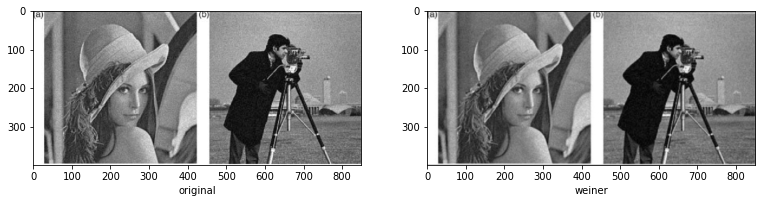

In [ ]:
image = cv2.imread('lena.jpeg', cv2.IMREAD_GRAYSCALE)
w = wiener(image)

plt.figure(figsize=(20, 20))

plt.subplot(331)
plt.xlabel('original')
plt.imshow(image, cmap=plt.cm.gray)

plt.subplot(332)
plt.xlabel('weiner')
plt.imshow(w, cmap=plt.cm.gray)


plt.show()

Salt pepper noise generator

In [ ]:
import random
  
def add_spnoise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        img[y_coord][x_coord] = 0
          
    return img